Unsupervised Learning
====

The customer segments data is included as a selection of 440 data points collected on data found from clients of a wholesale distributor in Lisbon, Portugal. More information can be found on the UCI Machine Learning Repository.

Note (m.u.) is shorthand for monetary units.

Features:
- 1) Fresh: annual spending (m.u.) on fresh products (Continuous)
- 2) Milk: annual spending (m.u.) on milk products (Continuous)
- 3) Grocery: annual spending (m.u.) on grocery products (Continuous)
- 4) Frozen: annual spending (m.u.) on frozen products (Continuous)
- 5) Detergents_Paper: annual spending (m.u.) on detergents and paper - products (Continuous)
- 6) Delicatessen: annual spending (m.u.) on and delicatessen products (Continuous)
- 7) Channel: {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)
- 8) Region: {Lisbon - 1, Oporto - 2, or Other - 3} (Nominal)

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with.

## Getting Started

In [2]:
# Import necessary libraries: pandas, numpy, matplotlib, seaborn
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read dataset
# For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — 
# with focus instead on the six product categories recorded for customers.

# import dataset
data = pd.read_csv('customers.csv')
# drop columns Channel and Region
data = data.drop(['Channel', 'Region'], axis=1)

## Data Exploration

In [7]:
# Let's take a look at dataset
# Your code here
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
# How many observations are in this data set?
# Is there any missing value?
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [13]:
#descriptive statistics of the dataset
# Your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


### Visualization: Purchase Behavior

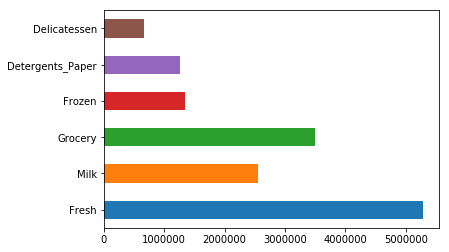

In [24]:
# The dataset is composed of six important product categories: 
# 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'. 
# Consider what each category represents in terms of products you could purchase.

# Plot total purchases on each product categories
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('customers.csv')
data = data.drop(columns=['Channel', 'Region'])
data.sum().plot(kind='barh')

#### What is distribution of Total Purchases of each person

In [25]:
data_percentage = data
data_percentage['total'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicatessen']


In [26]:
data_percentage['Fresh'] = data['Fresh'] / data_percentage['total']
data_percentage['Milk'] = data['Milk'] / data_percentage['total']
data_percentage['Grocery'] = data['Grocery'] / data_percentage['total']
data_percentage['Frozen'] = data['Frozen'] / data_percentage['total']
data_percentage['Detergents_Paper'] = data['Detergents_Paper'] / data_percentage['total']
data_percentage['Delicatessen'] = data['Delicatessen'] / data_percentage['total']
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224,34112
1,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388,33266
2,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258,36610
3,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301,27381
4,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473,46100


In [27]:
# Calculate total purchases
# Hint: sum by columns
# Your code here
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224,34112
1,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388,33266
2,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258,36610
3,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301,27381
4,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473,46100


In [30]:
# Number of row in dataset
nrows = data.shape[0]
nrows

440

#### create list index of 10% lowest spenders 

In [35]:
data_percentage.nsmallest(44, 'total').index.values

array([154,  97,  98, 355, 131, 275, 327, 299, 352, 203, 184, 367,  34,
       274, 364, 439, 362, 361, 219, 369, 344, 228, 151, 168, 320, 186,
       206, 350, 375, 250, 392, 238, 378, 433, 359, 192, 290,  95, 391,
       233, 204, 174, 280, 224], dtype=int64)

In [37]:
select_lowest = data_percentage.nsmallest(int(data_percentage.shape[0]/10), 'total').index.values
select_lowest

array([154,  97,  98, 355, 131, 275, 327, 299, 352, 203, 184, 367,  34,
       274, 364, 439, 362, 361, 219, 369, 344, 228, 151, 168, 320, 186,
       206, 350, 375, 250, 392, 238, 378, 433, 359, 192, 290,  95, 391,
       233, 204, 174, 280, 224], dtype=int64)

#### create list index of 10% highest spenders.

In [39]:
select_highest = data_percentage.nlargest(int(data_percentage.shape[0]/10), 'total').index.values
select_highest

array([ 85,  47, 181, 183,  61,  86, 325, 333,  23, 211, 125, 284,  92,
       251,  65, 103,  56, 145,  87, 437, 435, 258,  49,  39, 259, 427,
       216, 176, 319,  77, 282,  28, 196, 331, 163,  71, 201,  12,  45,
       239, 165, 171,  24, 202], dtype=int64)

#### how the 10% lowest spenders compare to the 10% highest spenders.

In [43]:
# Using select_lowest index to select 10% lowest spenders 
lowest = data.iloc[select_lowest, :]
lowest['Spending'] = 'Low'
lowest.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total,Spending
154,0.688053,0.060841,0.151549,0.082965,0.007743,0.008850,904,Low
97,0.186747,0.117702,0.282669,0.358665,0.025023,0.029194,2158,Low
98,0.203150,0.045234,0.314216,0.361470,0.022617,0.053312,2476,Low
355,0.054519,0.208608,0.577331,0.070301,0.052798,0.036442,3485,Low
131,0.563271,0.157909,0.084182,0.092761,0.018767,0.083110,3730,Low


In [44]:
# Using select_highest index to select 10% highest spenders 
highest = data.iloc[select_highest, :]
highest['Spending'] = 'High'
highest.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total,Spending
85,0.080629,0.231111,0.464153,0.005133,0.204246,0.014728,199891,High
47,0.230736,0.281552,0.288360,0.040381,0.125424,0.033547,192714,High
181,0.589744,0.155793,0.095431,0.088053,0.026019,0.044960,190169,High
183,0.198440,0.236694,0.108626,0.196755,0.001287,0.258198,185683,High
61,0.216673,0.231304,0.359282,0.019616,0.160965,0.012159,165881,High


In [52]:
# Merge 10 highest and 10 lowest to high_and_low dataset
high_and_low = highest.append(lowest)

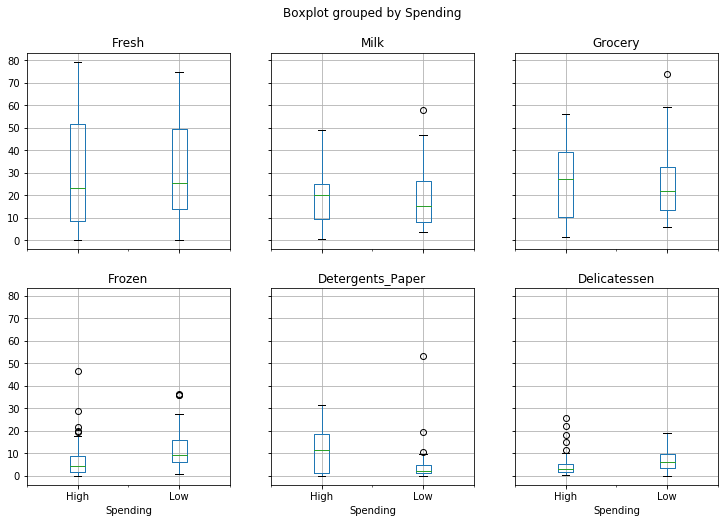

In [34]:
# Use boxplot with param: by='Spending', figsize=(12, 8), layout=(2, 3)
# Your code here


The main difference between purchasing habits in groups appears on variables **Frozen, Detergents_Paper and Delicatessen**. Clients that spend more tend to buy more (relatively speaking) on Detergents and Paper and less on Frozen Goods and Delicatessen than clients spending less.

## PCA

**Normalization** is important in **PCA** since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance. So we need to scale our data first.

In [61]:
# Import scale from sklearn.preprocessing
from sklearn.preprocessing import scale

# Scale data and called it as X
X = pd.DataFrame(scale(data), index=data.index, columns=data.columns)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,-0.014611,1.023251,-0.054858,-0.880951,0.051638,-0.196712,0.033649
1,-0.657045,1.127990,0.396183,-0.467520,0.307121,0.128111,0.001514
2,-0.812784,0.647109,-0.135292,-0.354847,0.270529,3.817332,0.128535
3,0.441494,-1.096545,-0.516330,1.134352,-0.690865,0.401308,-0.222026
4,0.466117,-0.444159,-0.502786,-0.184567,-0.442462,1.483100,0.489011


In [62]:
# Import PCA
# Your code here
from sklearn.decomposition import PCA
# Apply PCA by fitting the scaled data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
# pca_loadings
pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns,
                            columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

# Transform X using the PCA fit above
pca_data = pd.DataFrame(pca.fit_transform(X),
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                        index=X.index)

### Analyzing PCA Samples

### Visualizing a Biplot

In [64]:
def biplot(origin_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    origin_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'PC1'], y=reduced_data.loc[:, 'PC2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, origin_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

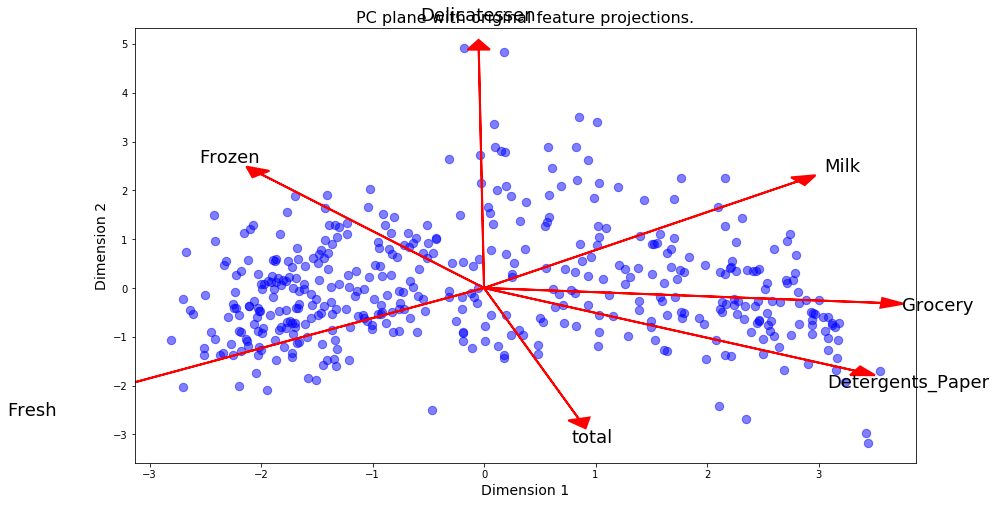

In [65]:
# Using provided biplot function to make a biplot
# Your code here
biplot(data, pca_data, pca)

### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

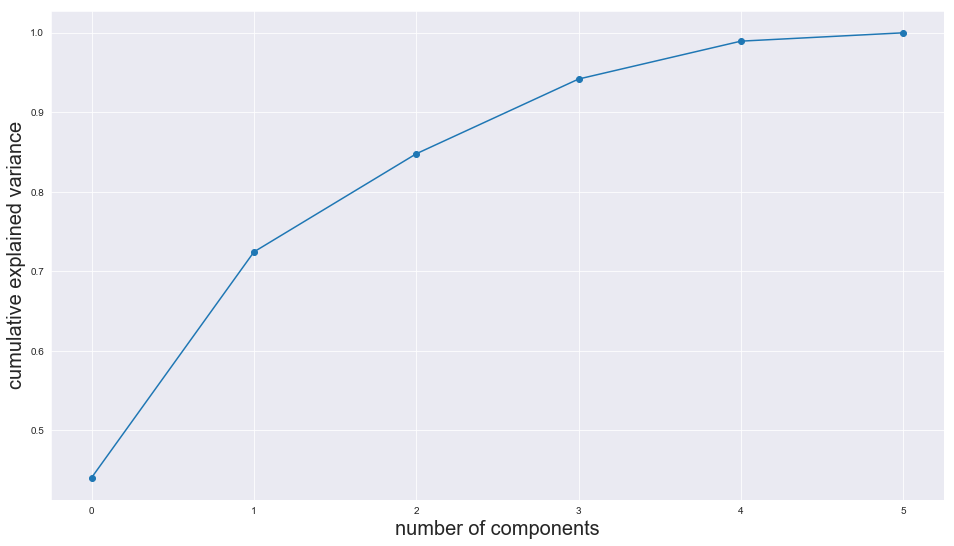

In [49]:
# Your code here


## Clustering

### K-Means

To use K-Means algorithms we need to define K value first. One way to choose K value, we use elbow algorithms

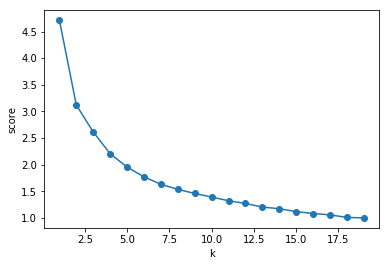

In [69]:
# Import KMeans from sklearn
# Your code here
from sklearn.cluster import KMeans

# Choose the range of k value we want to test (1 - 20)
# k_values = # Your code here
k_values = range(1,20)

kmeans = KMeans(n_clusters=k_values)

# For each value of K, we create a KMeans model and save in k_mean_models
# k_mean_models = # Your code here
k_mean_models = [KMeans(n_clusters=k) for k in k_values]

# For each Models, we fit with scaled data and calculate score
# scores = # Your code here
scores = [kmean.fit(X).score(X) for kmean in k_mean_models]
norm_scores = [score/max(scores) for score in scores]

plt.plot(k_values, norm_scores, '-o')
plt.xlabel('k')
plt.ylabel('score');

### Hierarchical

In [70]:
# Import dendrogram, linkage from scipy.cluster.hierarchy
# Your code here
from scipy.cluster.hierarchy import dendrogram, linkage

In [75]:
# generate the linkage matrix
# Your code here
Z = linkage(X, 'ward')

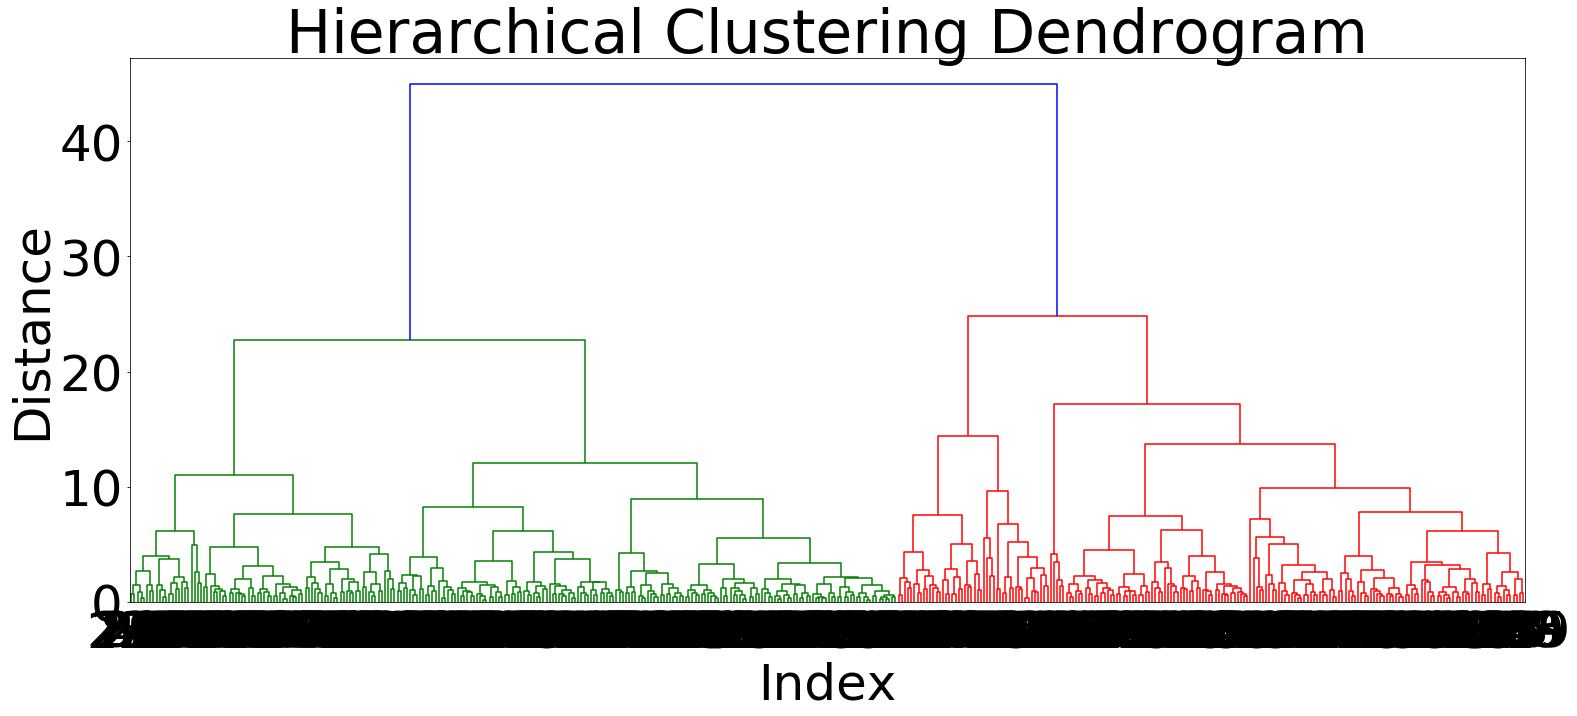

In [76]:
# calculate full dendrogram
# Hint: refer to lecture notebook
# Your code here
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=60)
plt.xlabel('Index', fontsize=50)
plt.ylabel('Distance', fontsize=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

ax = dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=50.,  # font size for the x axis labels
    labels=range(len(X)),
)

plt.show()

In [111]:
# To apply hierarchical in product, we use AgglomerativeClustering
# in sklearn package instead of scipy
# so import it first
# Your code here
from sklearn.cluster import AgglomerativeClustering

# Create AgglomerativeClustering model with n_clusters equals to the number of cluster
# you think it's the best one
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
X_arr = X.values
# fit model with scaled data
# Your code here
y_hc = hc.fit_predict(X_arr)


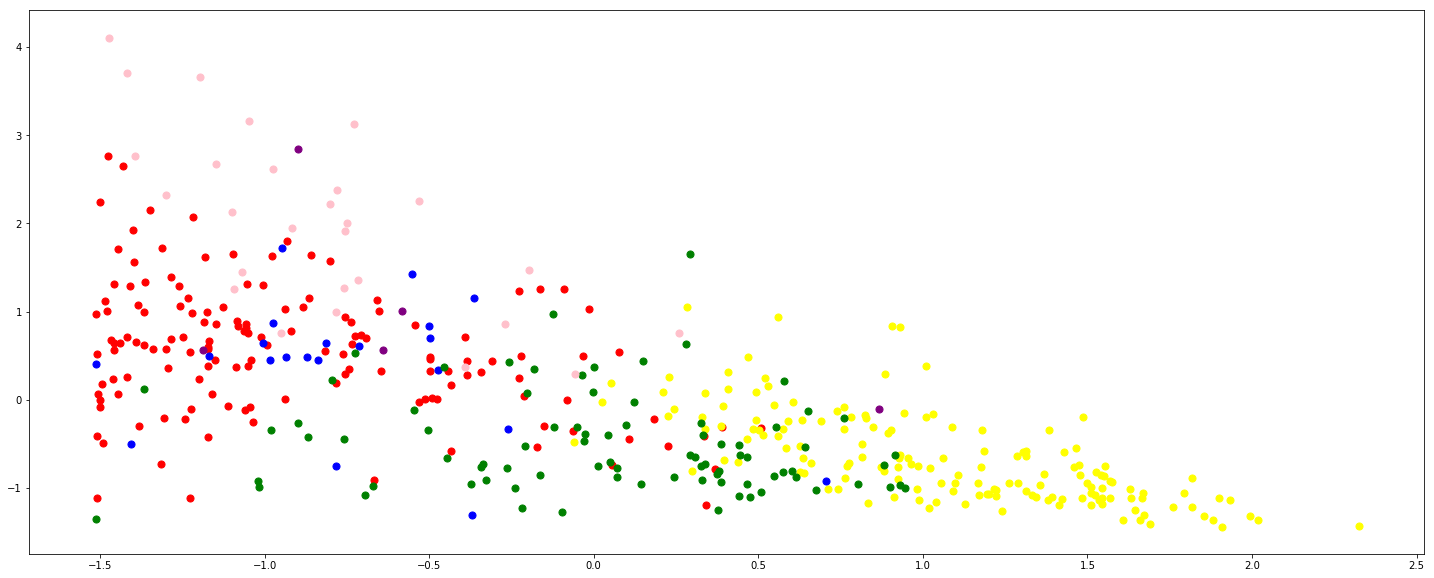

In [114]:
# Plot out result using scatter using the first 2 components of PCA
# Your code here
fig = plt.figure(figsize=(25, 10))

# Consider that you need to filter out only data points that belong to the first group
plt.scatter(X_arr[y_hc==0, 0], X_arr[y_hc==0, 1], s = 50, c = 'red', label = 'cluster_1')

plt.scatter(X_arr[y_hc==1, 0], X_arr[y_hc==1, 1], s = 50, c = 'yellow', label = 'cluster_1')

plt.scatter(X_arr[y_hc==2, 0], X_arr[y_hc==2, 1], s = 50, c = 'blue', label = 'cluster_2')

plt.scatter(X_arr[y_hc==3, 0], X_arr[y_hc==3, 1], s = 50, c = 'green', label = 'cluster_3')

plt.scatter(X_arr[y_hc==4, 0], X_arr[y_hc==4, 1], s = 50, c = 'purple', label = 'cluster_4')

plt.scatter(X_arr[y_hc==5, 0], X_arr[y_hc==5, 1], s = 50, c = 'pink', label = 'cluster_5')


plt.show()

## Great job!!!